### Решающие деревья (Decision tree)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
data = np.array([[0, 0],
                 [1, 0],
                 [0, 1],
                 [1, 1],
                 [2, 1],
                 [1, 2],
                 [2, 2],
                 [3, 2],
                 [6, 6],
                 [7, 6],
                 [8, 6],
                 [6, 7],
                 [7, 7],
                 [8, 7],
                 [9, 7],
                 [7, 8],
                 [8, 8],
                 [9, 8],
                 [8, 9],
                 [9, 9],])
labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
dec_tree_cls = tree.DecisionTreeClassifier(criterion = 'entropy')
dec_tree_cls.fit(data, labels)

DecisionTreeClassifier(criterion='entropy')

In [4]:
dec_tree_cls.predict([[0 , 0], [9, 9]])

array([0, 1])

[Text(0.5, 0.75, 'X[1] <= 4.0\nentropy = 0.971\nsamples = 20\nvalue = [8, 12]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]')]

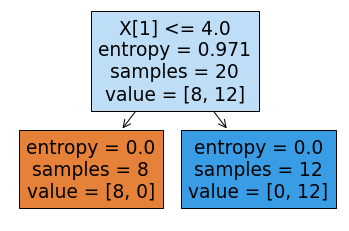

In [5]:
# Визуализация дерева
tree.plot_tree(dec_tree_cls, filled = True)

In [6]:
label_end = np.array([])
for i in range(len(data)):
    label_ex = dec_tree_cls.predict([[data[i, 0], data[i, 1]]])
    label_end = np.hstack([label_end, label_ex])

In [7]:
label_end

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

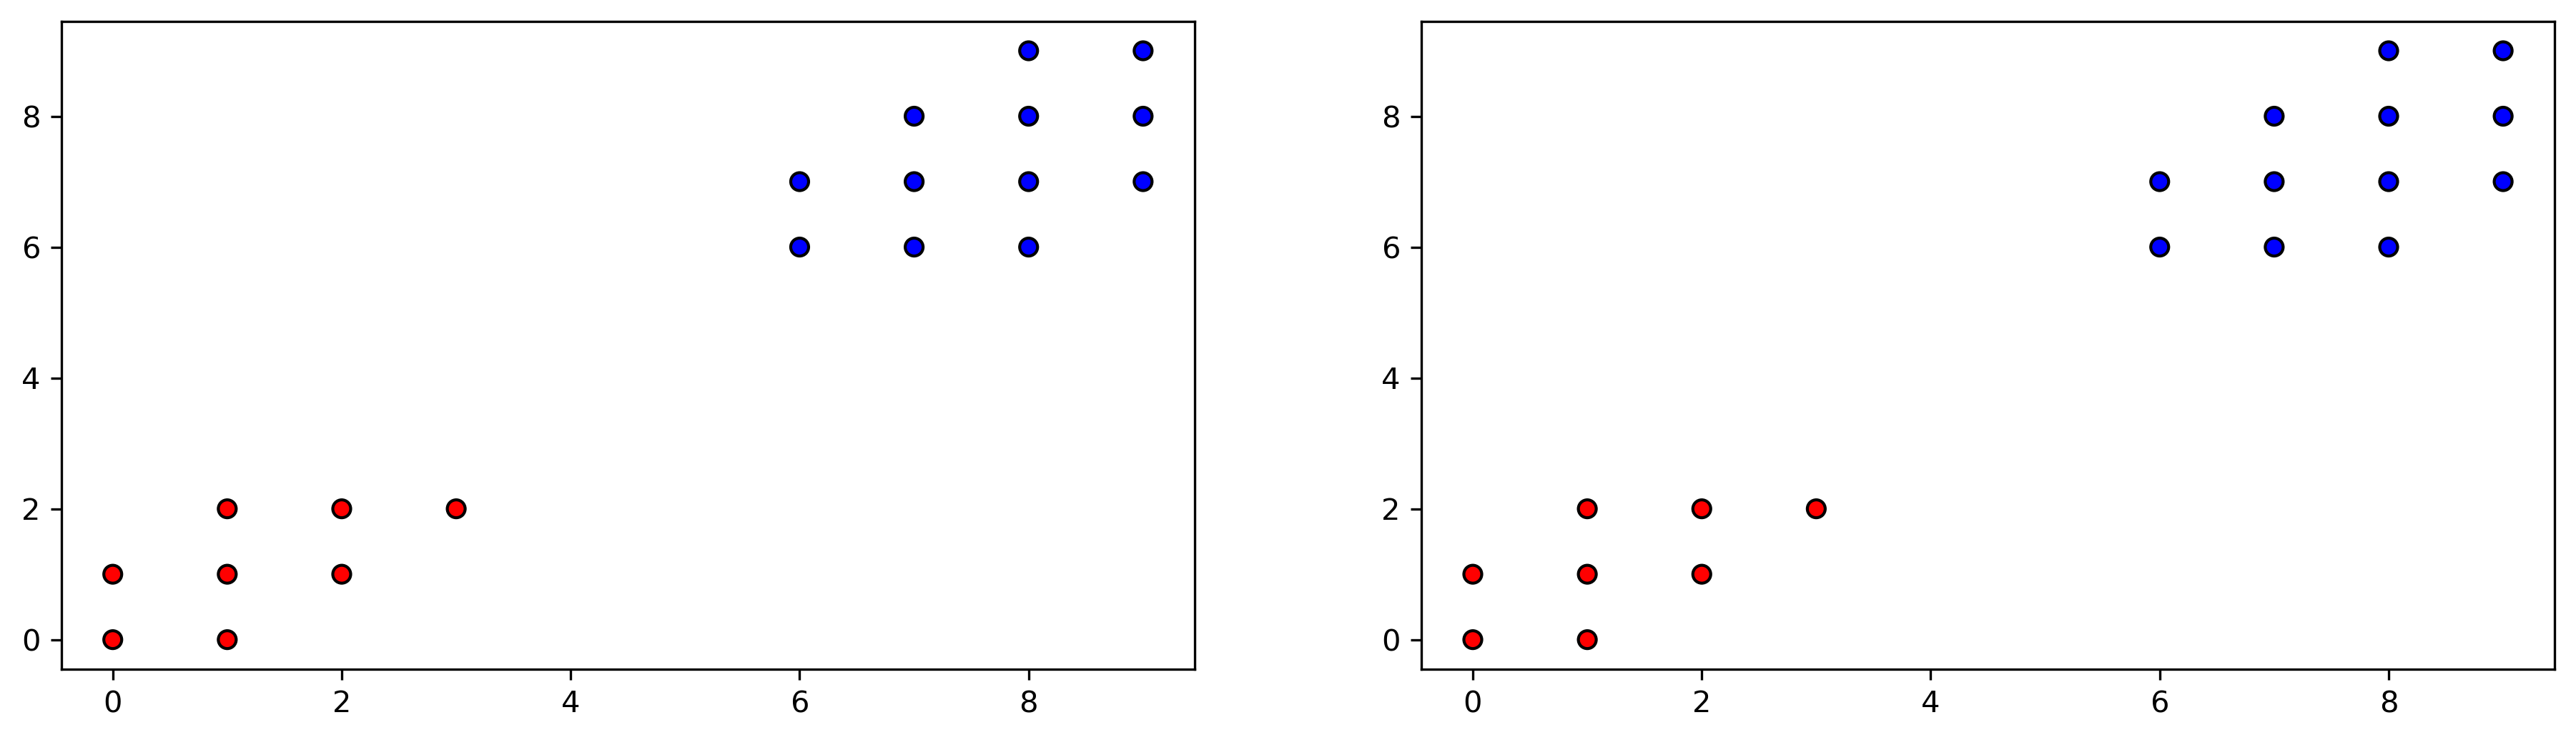

In [8]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
fig = plt.figure(figsize = (15, 4), dpi = 300)
ax = fig.add_subplot(121)
plt.scatter(data[:, 0], data[:, 1], c = labels,
            cmap = cm_bright, edgecolors = 'k')
ax = fig.add_subplot(122)
plt.scatter(data[:, 0], data[:, 1], c = label_end,
            cmap = cm_bright, edgecolors = 'k')

In [9]:
# Аналогичный подход с помощью регрессии
regr_ex = tree.DecisionTreeRegressor(max_depth = 5)
regr_ex.fit(data, labels)
regr_ex.predict([[1, 1]])

array([0.])

In [10]:
label_regr_end = np.array([])
for i in range(len(data)):
    label_ex = regr_ex.predict([[data[i, 0], data[i, 1]]])
    label_regr_end = np.hstack([label_regr_end, label_ex])

[Text(0.5, 0.75, 'X[1] <= 4.0\nsquared_error = 0.24\nsamples = 20\nvalue = 0.6'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 8\nvalue = 0.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 12\nvalue = 1.0')]

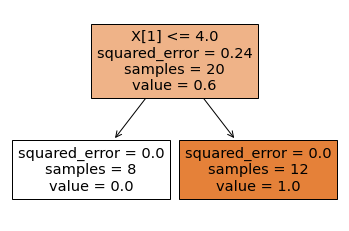

In [12]:
tree.plot_tree(regr_ex, filled = True)

In [ ]:
# Представление дереве в текстовом виде
from skleatn.tree import export_text
r = export_text()